<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

In [8]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



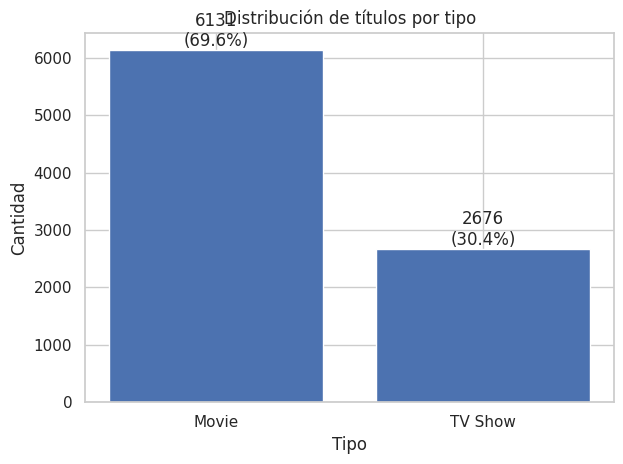

Conteos por tipo:
type
Movie      6131
TV Show    2676
Predomina: Movie


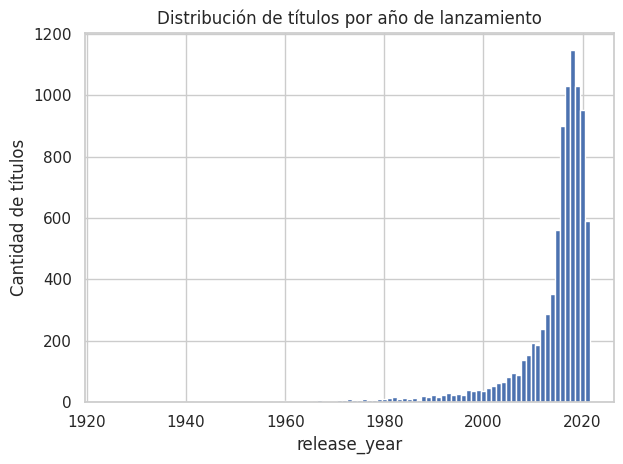

Conteo por década:
release_year
1920       1
1940      15
1950      11
1960      25
1970      70
1980     129
1990     274
2000     810
2010    5927
2020    1545

Rango: 1925–2021 | Mediana: 2017 (Q1=2013, Q3=2019)
Proporción de títulos en últimos 10 años (≥ 2011): 82.6%


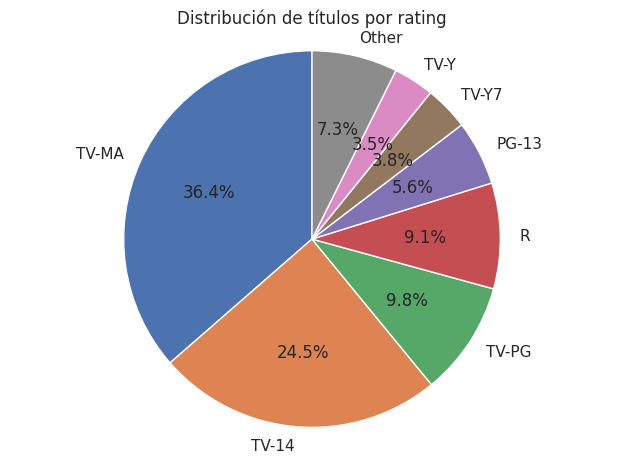

In [10]:
# FIXME
counts = df['type'].value_counts().sort_index()
plt.figure()
bars = plt.bar(counts.index, counts.values)
plt.title('Distribución de títulos por tipo')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')

total = counts.sum()
for i, v in enumerate(counts.values):
    pct = v / total
    plt.text(i, v, f'{v}\n({pct:.1%})', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Conteos por tipo:")
print(counts.to_string())
print(f"Predomina: {'Movie' if counts.get('Movie',0) > counts.get('TV Show',0) else 'TV Show'}")

#RESPUESTA 1: Predominan las peliculas, que el ususario se sienta menos compromiso, ya que una serie significa estar mas tiempo viendo la pantalla constantemente.

s = df['release_year'].dropna().astype(int)
miny, maxy = int(s.min()), int(s.max())


plt.figure()
plt.hist(s, bins=np.arange(miny, maxy + 2) - 0.5)
plt.title('Distribución de títulos por año de lanzamiento')
plt.xlabel('release_year')
plt.ylabel('Cantidad de títulos')
plt.tight_layout()
plt.show()


dec = (s // 10) * 10
dec_counts = dec.value_counts().sort_index()

print('Conteo por década:')
print(dec_counts.to_string())


q1, med, q3 = map(int, s.quantile([0.25, 0.5, 0.75]))
recent_threshold = maxy - 10  # "reciente" = últimos 10 años respecto del máximo observado
share_recent = (s >= recent_threshold).mean()

print(f'\nRango: {miny}–{maxy} | Mediana: {med} (Q1={q1}, Q3={q3})')
print(f'Proporción de títulos en últimos 10 años (≥ {recent_threshold}): {share_recent:.1%}')

#Respuesta 2: El histograma de release_year está claramente sesgado hacia años recientes: el volumen aumenta desde 2000, alcanza su punto más alto en 2010–2019 y se mantiene elevado en 2020–2021. Las décadas anteriores (90s/80s) representan una fracción pequeña. Conclusión: el catálogo está dominado por títulos recientes.

s = (df['rating'].fillna('Unknown').astype(str).str.strip().value_counts())

# Top 7 + "Other" sin usar pd.concat (evita depender de 'pd' aquí)
if len(s) > 7:
    labels = s.index[:7].tolist() + ['Other']
    values = s.values[:7].tolist() + [int(s.values[7:].sum())]
else:
    labels = s.index.tolist()
    values = s.values.tolist()

# Gráfico de torta (matplotlib ya importado como plt)
plt.figure()
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de títulos por rating')
plt.axis('equal')
plt.tight_layout()
plt.show()



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


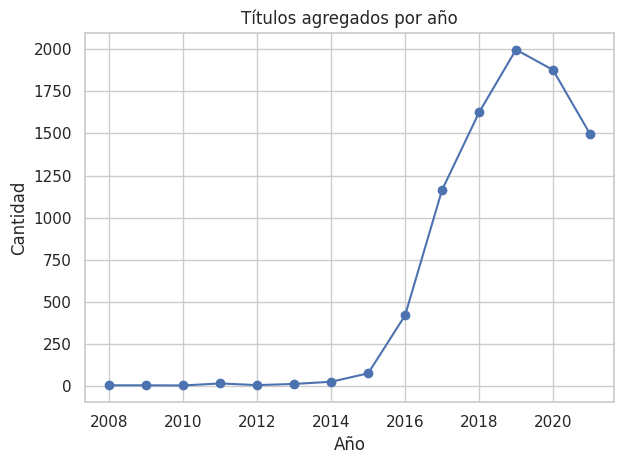

Año pico: 2019 con 1999 títulos añadidos.


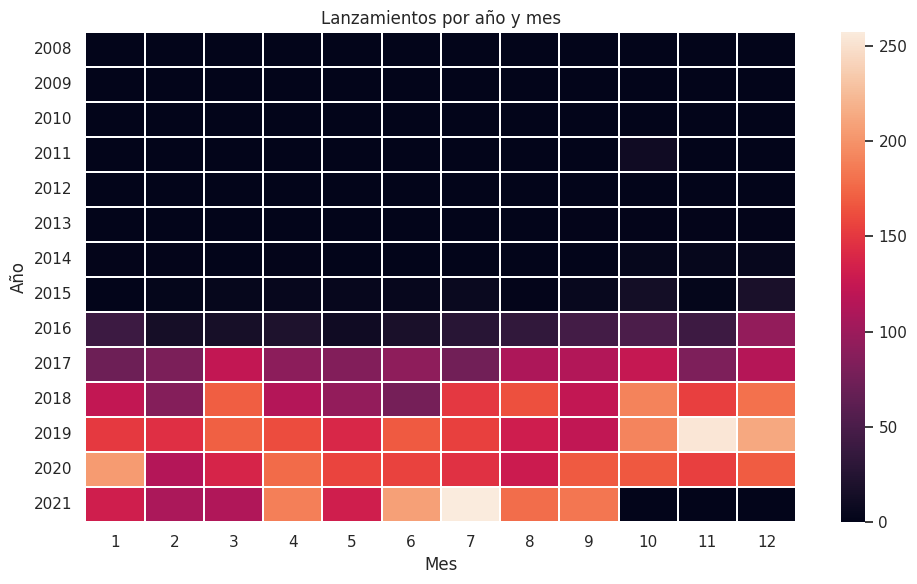

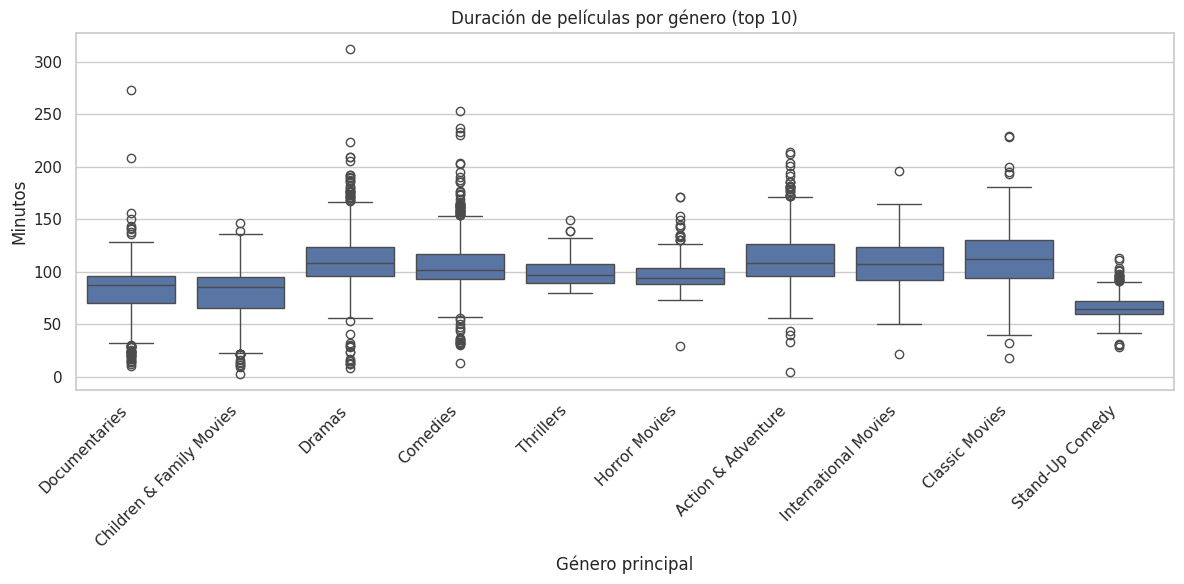

                          count  median   mean  min  max
main_genre                                              
Classic Movies               80   112.0  114.8   18  229
Action & Adventure          859   108.0  113.5    5  214
Dramas                     1600   108.0  111.4    8  312
International Movies        128   107.0  108.1   22  196
Comedies                   1210   102.0  106.7   13  253
Thrillers                    65    97.0  100.0   80  149
Horror Movies               275    94.0   98.2   29  171
Documentaries               829    87.0   82.1   10  273
Children & Family Movies    605    86.0   78.4    3  146
Stand-Up Comedy             334    65.0   66.9   28  113


In [12]:
# FIXME
df['date_added_dt'] = pd.to_datetime(df['date_added'], errors='coerce')

ts_year = (df.dropna(subset=['date_added_dt'])
             .assign(year_added=lambda d: d['date_added_dt'].dt.year)
             .groupby('year_added', as_index=False).size())

plt.figure()
plt.plot(ts_year['year_added'], ts_year['size'], marker='o')
plt.title('Títulos agregados por año')
plt.xlabel('Año'); plt.ylabel('Cantidad')
plt.tight_layout(); plt.show()

#Respuesta 4: se muestra un crecimiento marcado desde mediados de los 2010, con un despegue claro entre 2017–2018 y un máximo alrededor de 2019–2020. Esto calza con la expansión global y el empuje de producciones originales
peak_year = int(ts_year.loc[ts_year['size'].idxmax(), 'year_added'])
peak_count = int(ts_year['size'].max())
print(f"Año pico: {peak_year} con {peak_count} títulos añadidos.")

dd = (df.dropna(subset=['date_added_dt'])
        .assign(year_added=lambda d: d['date_added_dt'].dt.year.astype(int),
                month_added=lambda d: d['date_added_dt'].dt.month))

heat = (dd.groupby(['year_added', 'month_added'])
          .size().unstack(fill_value=0).sort_index())

plt.figure(figsize=(10,6))
sns.heatmap(heat, linewidths=.3)
plt.title('Lanzamientos por año y mes')
plt.xlabel('Mes'); plt.ylabel('Año')
plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

#Respuesta 5:hay planificación de lanzamientos hacia fin de año y repuntes previos a temporadas altas, por lo que conviene comparar métricas por mes o, al menos, por semestre

movies = (df[df['type']=='Movie']
            .loc[df['duration'].str.contains('min', na=False)]
            .assign(minutes=lambda d: d['duration'].str.extract(r'(\d+)').astype(int),
                    main_genre=lambda d: d['listed_in'].astype(str).str.split(',').str[0].str.strip()))

top_genres = movies['main_genre'].value_counts().head(10).index
subset = movies[movies['main_genre'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='main_genre', y='minutes')
plt.title('Duración de películas por género (top 10)')
plt.xlabel('Género principal'); plt.ylabel('Minutos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(); plt.show()

summary = (subset.groupby('main_genre')['minutes']
                 .agg(['count','median','mean','min','max'])
                 .sort_values('median', ascending=False).round(1))
print(summary)

#el boxplot de duración por género la mediana global de películas ronda 90–100 min. Drama y Documental figuran entre los géneros más largos y con mayor dispersión (colas amplias), seguidos por Acción/Aventura; Comedia, Familia e Infantil tienden a ser más cortos y con variabilidad menor



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



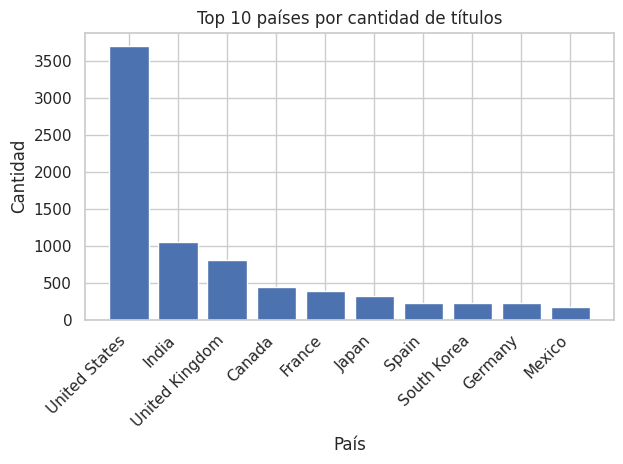

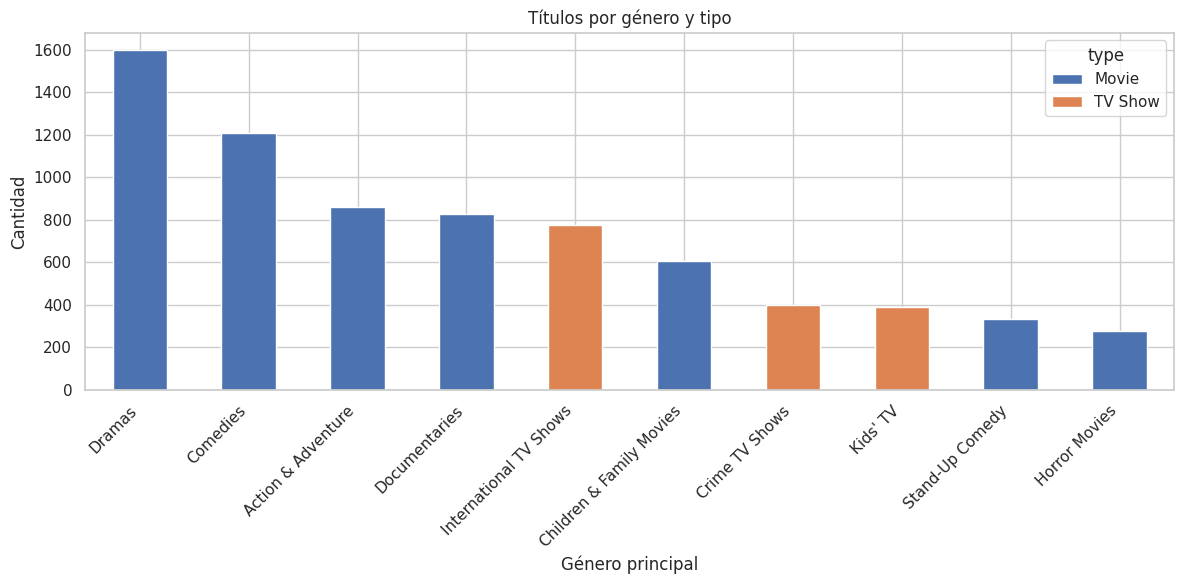

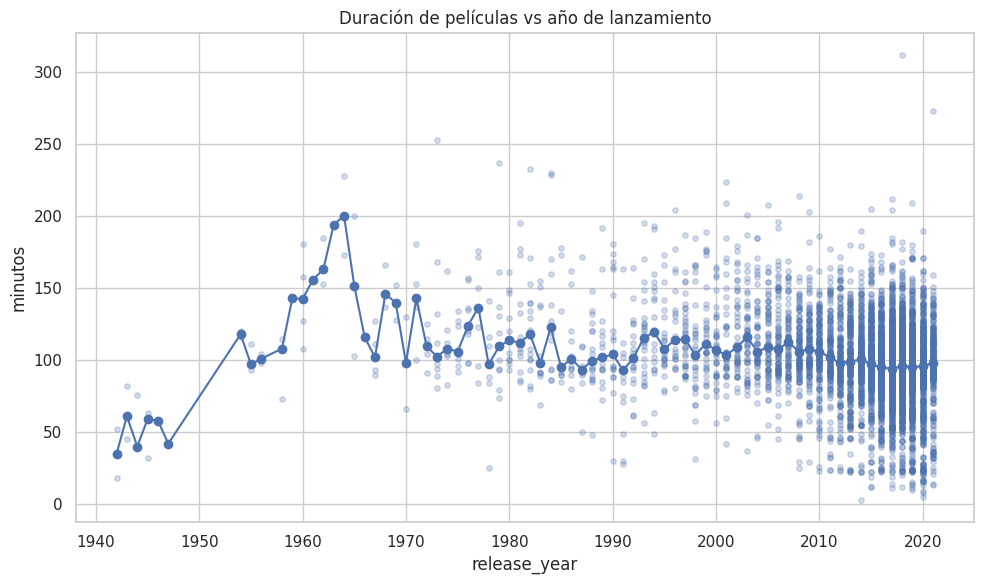

In [18]:
# FIXME
countries = (df['country']
               .dropna()
               .str.split(',')
               .explode()
               .str.strip())

top_countries = countries.value_counts().head(10)

plt.figure()
plt.bar(top_countries.index, top_countries.values)
plt.title('Top 10 países por cantidad de títulos')
plt.xlabel('País'); plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(); plt.show()

top_countries

#Respuesta 7:en el ranking por país suele dominar con amplia ventaja Estados Unidos; detrás aparecen India y Reino Unido, y más abajo Canadá, Japón, Corea del Sur y Francia.La distribución es muy concentrada en el mundo angloparlante y en India; las coproducciones cuentan para todos los países listados, por lo que esa columna refleja bien la diversidad, pero también infla a países con muchas coproducciones.

g = (df['listed_in'].astype(str)
                 .str.split(',')
                 .str[0]
                 .str.strip()
                 .rename('main_genre'))
tt = df['type']  # Movie / TV Show

by_genre_type = (pd.crosstab(g, tt)
                   .assign(_total=lambda d: d.sum(1))
                   .sort_values('_total', ascending=False)
                   .drop(columns='_total'))

# Nos quedamos con los 10 géneros más frecuentes para que el gráfico sea legible
topN = 10
plot_data = by_genre_type.head(topN)

ax = plot_data.plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_title('Títulos por género y tipo')
ax.set_xlabel('Género principal'); ax.set_ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(); plt.show()

by_genre_type.head(20)

#Respuesta 8: En la comparación por género y tipo, las películas se concentran en “Dramas”, “Comedies” y “Documentaries”; las series aparecen sobre todo en categorías como “TV Dramas”, “TV Comedies” e “International TV Shows”. En términos relativos, los géneros con prefijo “TV …” están asociados a series

movies = (df[df['type']=='Movie']
            .loc[df['duration'].str.contains('min', na=False)]
            .assign(minutes=lambda d: d['duration'].str.extract(r'(\d+)').astype(int),
                    year=lambda d: d['release_year'].astype(int)))

plt.figure(figsize=(10,6))
plt.scatter(movies['year'], movies['minutes'], alpha=0.25, s=15)
plt.title('Duración de películas vs año de lanzamiento')
plt.xlabel('release_year'); plt.ylabel('minutos')

med = (movies.groupby('year')['minutes'].median()
               .reset_index())
plt.plot(med['year'], med['minutes'], marker='o')
plt.tight_layout(); plt.show()

#Respuesta 9: los estándares de duración se han mantenido bastante estables, con variabilidad moderada y colas largas hacia títulos muy extensos.


## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME

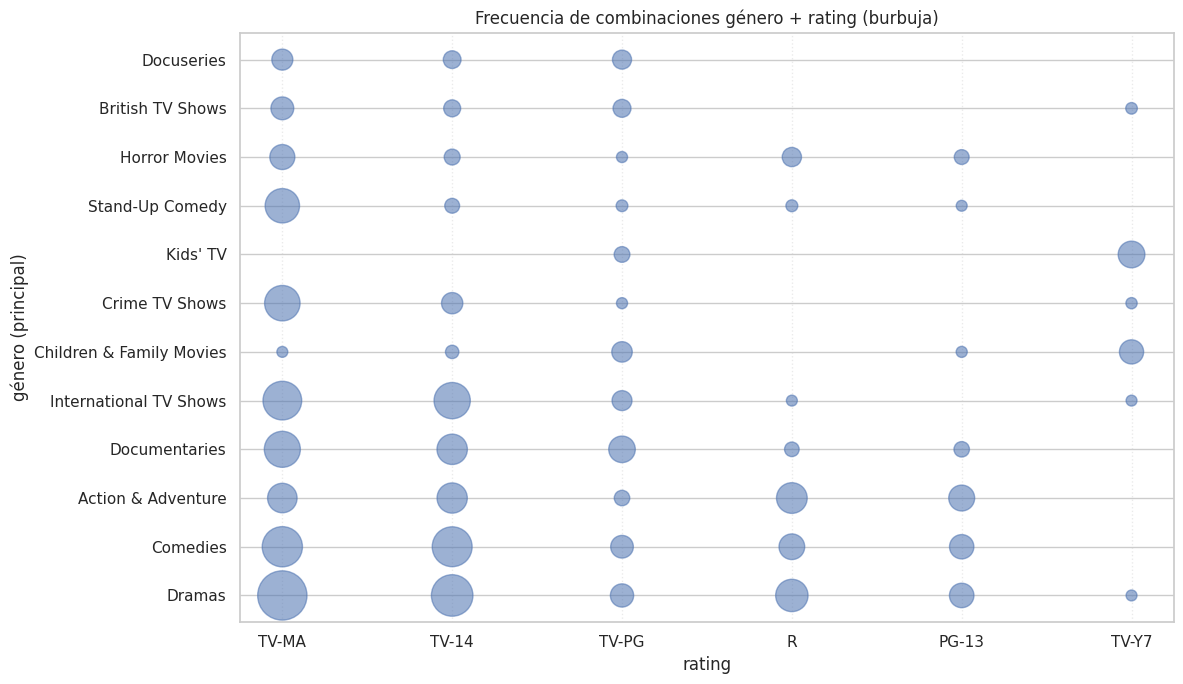

In [20]:
genre = (df['listed_in'].astype(str).str.split(',').str[0].str.strip().rename('genre'))
rating = (df['rating'].fillna('Unknown').astype(str).str.strip().rename('rating'))

pairs = (pd.concat([genre, rating], axis=1)
           .value_counts()
           .rename('n')
           .reset_index())

# Para que el gráfico sea legible: top géneros y top ratings
top_genres  = genre.value_counts().head(12).index
top_ratings = rating.value_counts().head(6).index
plot_df = pairs[pairs['genre'].isin(top_genres) & pairs['rating'].isin(top_ratings)]

# --- Gráfico de burbujas ---
genres  = list(top_genres)
ratings = list(top_ratings)
gx = {g:i for i,g in enumerate(genres)}
rx = {r:i for i,r in enumerate(ratings)}

x = plot_df['rating'].map(rx)
y = plot_df['genre'].map(gx)


s = (plot_df['n'] / plot_df['n'].max())*1200 + 60

plt.figure(figsize=(12,7))
plt.scatter(x, y, s=s, alpha=0.55)
plt.xticks(range(len(ratings)), ratings, rotation=0)
plt.yticks(range(len(genres)), genres)
plt.xlabel('rating'); plt.ylabel('género (principal)')
plt.title('Frecuencia de combinaciones género + rating (burbuja)')
plt.grid(True, axis='x', linestyle=':', alpha=0.4)
plt.tight_layout(); plt.show()

#Respuesta 10: el mapa concentra burbujas grandes en TV-MA (Adultos) para géneros “TV …” y dramas/documentales, mientras que las burbujas de TV-Y/TV-G se agrupan en kids/family.